In [27]:
from wao import whale_optimization_algorithm
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv(r'C:\Users\KARAN\Desktop\BBS Sir Proj\wine-clustering.csv',encoding='unicode_escape')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


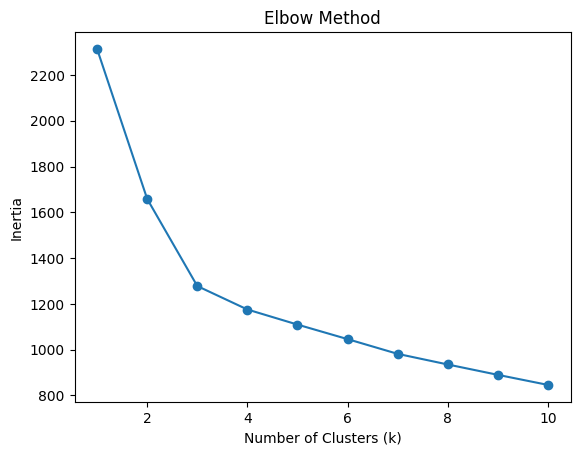

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [30]:
X=df.values
num_clusters=3
num_agents=25
num_iterations=100
best_agent=whale_optimization_algorithm(X,num_clusters,num_agents,num_iterations)
labels = np.argmin(np.linalg.norm(X[:, np.newaxis, :] - best_agent['cluster_centers'], axis=2), axis=1)

In [31]:
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2], dtype=int64)

In [32]:
#Measures how well-separated clusters are. 
# It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5708303868116225


In [33]:
#Evaluates the compactness and separation between clusters. A lower Davies-Bouldin Index suggests better clustering.
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.531680181857682


In [34]:
#Measures the ratio of the between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)


Calinski-Harabasz Index: 556.1459974410649
